# **Sun-as-a-star analysis of coronal high-frequency quasi-periodic oscillations observed by an iPhone during the total solar eclipse of 20 April 2023 with 240 fps imaging**
### **Data Processing and Analysis Notebook**

**Authors**: [Yu Liang]
**Affiliation**: [Shanghai Astronomical Observatory, Chinese Academy of Sciences, Shanghai 200030, China]  
**Contact**: [yuliang@shao.ac.cn]  
**Last Updated**: [2024-12-10]  

---

### **Notebook Overview**

These Jupyter Notebook documents the processing and analysis of observational data collected during the 2023 total solar eclipse. The primary objectives of this Notebook include:

1. Preprocessing of raw white-light corona imaging data (dark field subtraction, flat field correction, and temporal registration).
2. Application of wavelet analysis to detect high-frequency quasi-periodic oscillations (HFQPOs).
3. Visualizations of the solar corona and statistical results for Sun-as-a-star analysis.

---

### **Dependencies**

The analysis relies on the following Python libraries (compatible versions):  
- `numpy==1.2.43`  
- `pandas==1.5.1`  
- `scikit-image==0.20.0`  
- `matplotlib==3.7.1`  
- `astropy==5.1.1`  
- `opencv-python==4.7.0.72`  
- `Pillow==9.2.0`  
- `scipy==1.13.1`  


<!-- A complete list of dependencies can be found in the accompanying `requirements.txt`. -->

---

### **Data Source**

- **Observation Site**: Learmonth Airport, Australia  
- **Instrument**: iPhone with 565 nm filter, sampling at 240 fps, frams width * height: 720.0 * 1280.0, image shape:(1280, 720, 3)  
- **Date**: April 20, 2023  

---

### **Main Structure**

- **Section 1**: Data loading and inspection  
- **Section 2**: Preprocessing (dark field, flat field, and registration)  
- **Section 3**: Wavelet analysis and signal detection  
- **Section 4**: Results visualization and discussion  

---
### **Notebook 3.0**
#### img registration 1st. 
- input: *.jpg
- output: *.png, *.mp4,  and  *.fits

STEP 1: file load. 
- 

In [302]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from astropy.io import fits
import skimage.io as io 
import imageio as iio
from skimage import data
from skimage.registration import phase_cross_correlation
from skimage.registration._phase_cross_correlation import _upsampled_dft
from scipy.ndimage import fourier_shift
from PIL import Image
import cv2

In [303]:
path0 = '/Volumes/WD1T/share/TSE2023/'                  # input dir
path1 = '/Volumes/WD1T/share/TSE2023/iPhone/result/'    # input dir
pathfd  = path0 + 'iPhone/result/dfdatat/'              # pahtfd = path with flat and dark processed
    
dirr1t_png = path1 + 'r1dfdatat_png/'   # r1dfdatat: registration 1st dark flat data totally
if not os.path.exists(dirr1t_png):
    os.makedirs(dirr1t_png)
    
dirr1t = path1 + 'r1dfdatat/'  # r1dfdatat: registration 1st dark flat data totally
if not os.path.exists(dirr1t):
    os.makedirs(dirr1t)

In [304]:
import os
import glob

# delete ._* files
files_to_delete = glob.glob(os.path.join(pathfd, '._*'))

for file in files_to_delete:
    try:
        os.remove(file)
        print(f"Deleted: {file}")
    except Exception as e:
        print(f"Error deleting {file}: {e}")

In [305]:
# 5.0 data dark processing
pathd = pathfd
listd = os.listdir(pathfd)
listd.sort()
print(listd[0:10])
print(len(listd))

['image_00001.fits', 'image_00002.fits', 'image_00003.fits', 'image_00004.fits', 'image_00005.fits', 'image_00006.fits', 'image_00007.fits', 'image_00008.fits', 'image_00009.fits', 'image_00010.fits']
13282


['image_00001.fits', 'image_00002.fits', 'image_00003.fits', 'image_00004.fits', 'image_00005.fits', 'image_00006.fits', 'image_00007.fits', 'image_00008.fits', 'image_00009.fits', 'image_00010.fits', 'image_00011.fits', 'image_00012.fits', 'image_00013.fits', 'image_00014.fits', 'image_00015.fits', 'image_00016.fits', 'image_00017.fits', 'image_00018.fits', 'image_00019.fits', 'image_00020.fits', 'image_00021.fits', 'image_00022.fits', 'image_00023.fits', 'image_00024.fits', 'image_00025.fits', 'image_00026.fits', 'image_00027.fits', 'image_00028.fits', 'image_00029.fits', 'image_00030.fits', 'image_00031.fits', 'image_00032.fits', 'image_00033.fits', 'image_00034.fits', 'image_00035.fits', 'image_00036.fits', 'image_00037.fits', 'image_00038.fits', 'image_00039.fits', 'image_00040.fits', 'image_00041.fits', 'image_00042.fits', 'image_00043.fits', 'image_00044.fits', 'image_00045.fits', 'image_00046.fits', 'image_00047.fits', 'image_00048.fits', 'image_00049.fits', 'image_00050.fits',

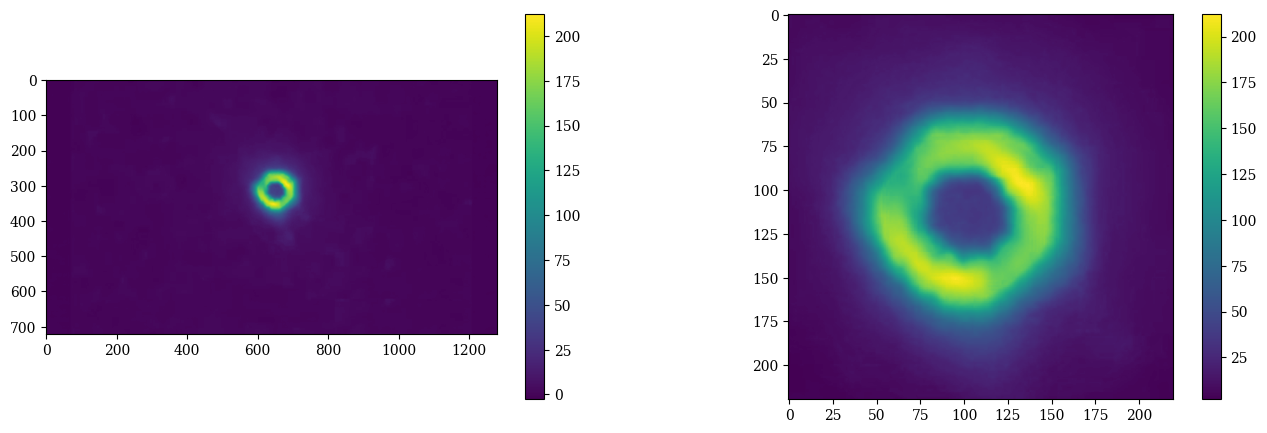

In [306]:
# 5.0 data dark processing
list0 = os.listdir(pathfd)
list0.sort()
print(list0)
st = 0               # start frame
fn = len(list0) - st
st1 = st + 6000
ch1 = 0 # chanel seclet of the jpg file.

hdu = fits.open(pathfd + list0[st1])
img0np = hdu[0].data
# img0np = np.array(img0)

sr,er,sc,ec = 200, 200 + 220 , 550, 550 + 220
plt.figure(figsize = [16,5])
plt.subplot(121)
plt.imshow(img0np[:, :])
plt.colorbar()
plt.subplot(122)
plt.imshow(img0np[sr:er, sc:ec])
plt.colorbar()
plt.show()


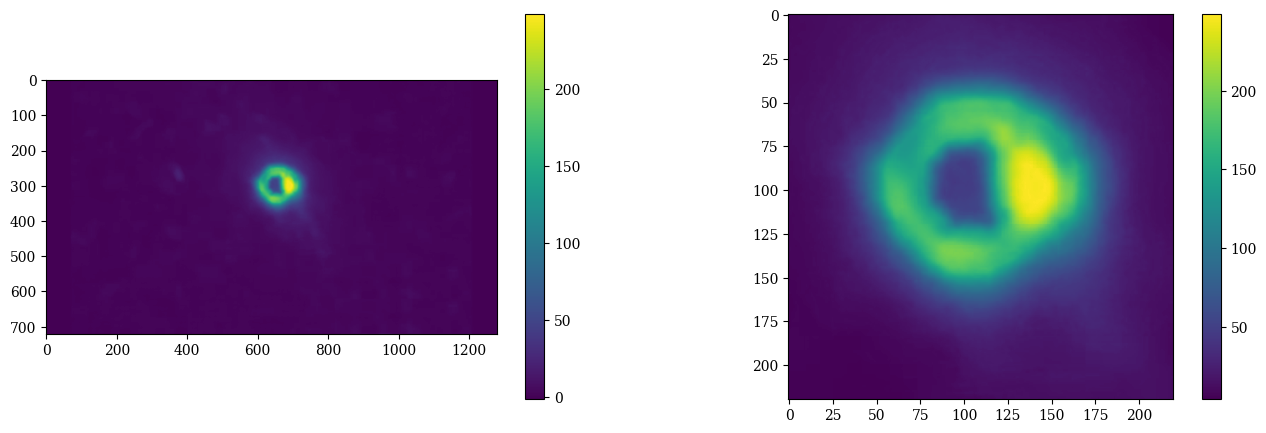

In [307]:
# 5.0 data dark processing
st1 = st + 13281
hdu = fits.open(pathfd + list0[st1])
img0np = hdu[0].data

plt.figure(figsize = [16,5])
plt.subplot(121)
plt.imshow(img0np[:, :])
plt.colorbar()
plt.subplot(122)
plt.imshow(img0np[sr:er, sc:ec])
plt.colorbar()
plt.show()

---
### **Notebook 3.0**
#### img registration 1st. 
STEP 2: Test of the shift algrithm. 
---


In [308]:
fg = 1                  # file gap 
fnu = int(fn / fg)      # fnu: file name useful
hdu = fits.open(pathfd + list0[st1])
img0np = hdu[0].data
img0c = img0np[sr:er, sc:ec]
image = img0c[:,:]
print(image.shape, image.dtype)

(220, 220) >f4


Known offset (y, x): (-5, 3.32)


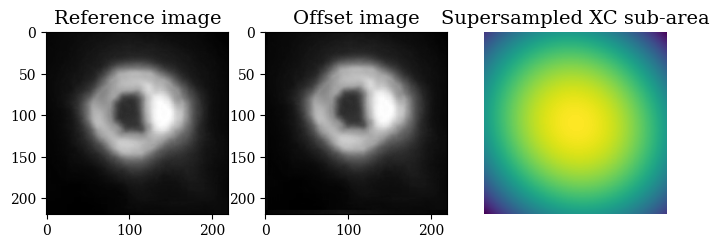

Detected subpixel offset (y, x): [ 5.   -3.32]


In [309]:
# offset_image = hadc[1,:,:]

shift = (-5, 3.32)
# The shift corresponds to the pixel offset relative to the reference image
offset_image = fourier_shift(np.fft.fftn(image), shift)
offset_image = np.fft.ifftn(offset_image)

# #img0 = Image.open(pathfd + list0[12828])
# img0 = Image.open(pathfd + list0[6899])
# img0np = np.array(img0)
# img0c = img0np[sr:er, sc:ec]
# offset_image = img0c[:,:,ch1]

print(f'Known offset (y, x): {shift}')

# subpixel precision
shift, error, diffphase = phase_cross_correlation(image, offset_image,
                                                  upsample_factor=100)
image_product = np.fft.fft2(image) * np.fft.fft2(offset_image).conj()

fig = plt.figure(figsize=(8, 3))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2, sharex=ax1, sharey=ax1)
ax3 = plt.subplot(1, 3, 3)

ax1.imshow(image, cmap='gray')
#ax1.set_axis_off()
ax1.set_title('Reference image')
offset0 = offset_image.real

ax2.imshow(offset0, cmap='gray')
#ax2.set_axis_off()
ax2.set_title('Offset image')

# Calculate the upsampled DFT, again to show what the algorithm is doing
# behind the scenes.  Constants correspond to calculated values in routine.
# See source code for details.
cc_image = _upsampled_dft(image_product, 150, 100, (shift*100)+75).conj()
ax3.imshow(cc_image.real)
ax3.set_axis_off()
ax3.set_title("Supersampled XC sub-area")
plt.show()

print(f'Detected subpixel offset (y, x): {shift}')

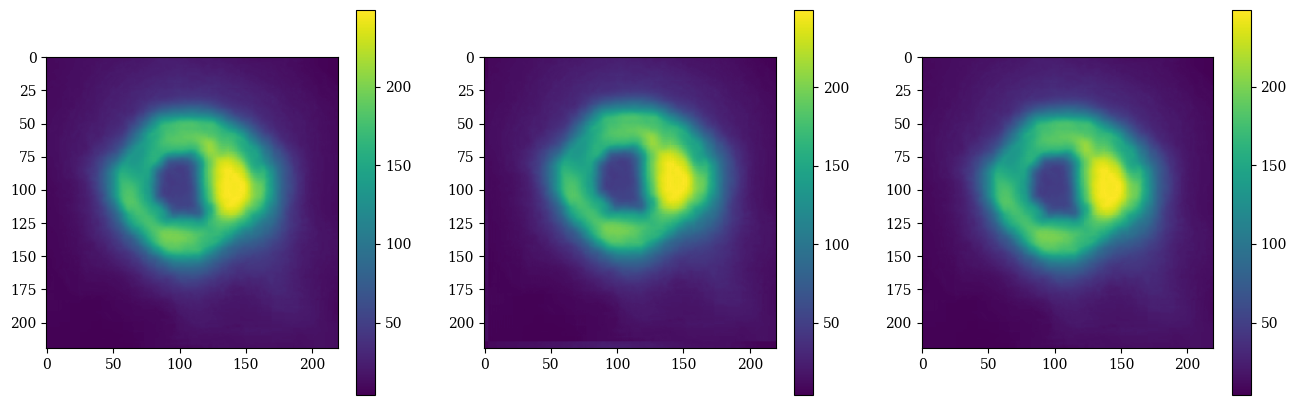

In [310]:
offset1 = fourier_shift(np.fft.fftn(offset0), shift)
offset1 = np.fft.ifftn(offset1)
imgcr = offset1.real
    
plt.figure(figsize = [16,5])
plt.subplot(131)
plt.imshow(img0c)
plt.colorbar()
plt.subplot(132)
plt.imshow(offset0)
plt.colorbar()
plt.subplot(133)
plt.imshow(imgcr)
plt.colorbar()
plt.show()

[0.   0.01]
/Volumes/WD1T/share/TSE2023/iPhone/result/dfdatat/ 13282 13282 13281


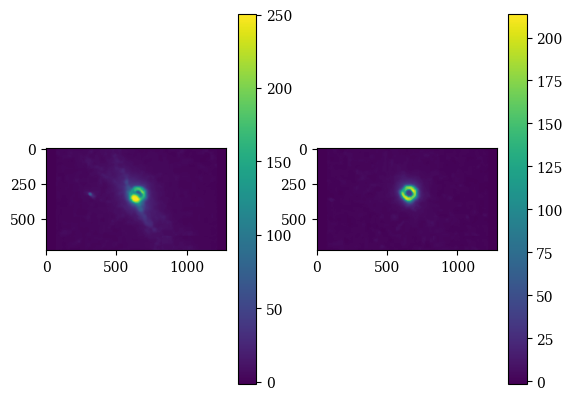

In [311]:
hdu = fits.open(pathfd + list0[st + 1])
imgnp = hdu[0].data
imgc = imgnp#[sr:er, sc:ec]
image = imgc[:,:]
image.shape
plt.subplot(121)
plt.imshow(image)
plt.colorbar()

hdu = fits.open(pathfd + list0[st + 3282])
imgnp = hdu[0].data
imgc = imgnp#[sr:er, sc:ec]
image1 = imgc[:,:]
plt.subplot(122)
plt.imshow(image1)
plt.colorbar()
# m0, m1 = np.mean(image), np.mean(image1)
# image1 = image1 / m1 * m0
shift, error, diffphase = phase_cross_correlation(image, image1, upsample_factor=100)
print(shift)

print(pathfd, len(list0), fnu, st1)

In [312]:
print(len(list0))
list0[3282]
# fnu
# for i in range(fnu):
#     print(i)

13282


'image_03283.fits'

In [313]:
st = 0
fn = len(list0) - st
list0[st],fn

('image_00001.fits', 13282)

---
### **Notebook 3.0**
#### img registration 1st. 
STEP 3: Calculate the frames shift value for the 1st time. 
The accrute registration will be later at the next notebook file.

In [314]:
# registration 1st
fg = 1                  # file gap 
fnu = int(fn / fg)      # fnu: file name useful
frmshift = np.zeros([2, fnu])

hdu = fits.open(pathfd + list0[st])
imgnp = hdu[0].data
imgc = imgnp[sr:er, sc:ec]
image = imgc[:,:]
    
for i in range(fnu):
    hdu = fits.open(pathfd + list0[i * fg + st])
    imgnp = hdu[0].data 
    imgc = imgnp[sr:er, sc:ec]
    offset_image = imgc[:,:]
    shift, error, diffphase = phase_cross_correlation(image, offset_image,
                                                upsample_factor=10)
    # image_product = np.fft.fft2(image) * np.fft.fft2(offset_image).conj()
    # cc_image = _upsampled_dft(image_product, 150, 100, (shift*100)+75).conj()
    print(f'Detected shift offset (y, x) of frame',i, f'is : {shift}')
    frmshift[:, i] = shift
np.save(path1 + 'refer_frmshift_1st.npy', frmshift)
     

Detected shift offset (y, x) of frame 0 is : [0. 0.]
Detected shift offset (y, x) of frame 1 is : [0. 0.]
Detected shift offset (y, x) of frame 2 is : [0. 0.]
Detected shift offset (y, x) of frame 3 is : [0.  0.1]
Detected shift offset (y, x) of frame 4 is : [0. 0.]
Detected shift offset (y, x) of frame 5 is : [0. 0.]
Detected shift offset (y, x) of frame 6 is : [0. 0.]
Detected shift offset (y, x) of frame 7 is : [0. 0.]
Detected shift offset (y, x) of frame 8 is : [0. 0.]
Detected shift offset (y, x) of frame 9 is : [0. 0.]
Detected shift offset (y, x) of frame 10 is : [0. 0.]
Detected shift offset (y, x) of frame 11 is : [0. 0.]
Detected shift offset (y, x) of frame 12 is : [0. 0.]
Detected shift offset (y, x) of frame 13 is : [0. 0.]
Detected shift offset (y, x) of frame 14 is : [0. 0.]
Detected shift offset (y, x) of frame 15 is : [0. 0.]
Detected shift offset (y, x) of frame 16 is : [0. 0.]
Detected shift offset (y, x) of frame 17 is : [0. 0.]
Detected shift offset (y, x) of fram

In [315]:
frmshift = np.load(path1 + 'refer_frmshift_1st.npy')
print(frmshift.shape)

(2, 13282)


---
### **Notebook 3.0**
#### img registration 1st. 
STEP 4: change the frame shift value with the fitting result. 

- During the registration process of a time-series coronal image. 
The offset calculated by the CC registration algorithm fluctuates greatly from frame 8000 onwards. Therefore, we use the result of the first-order fit instead of the original value as the result of the offset.

- DO NOT WARRY!
The accrute registration will be later at the next notebook file - **Notebook 4.0**.

(2, 13282)
8.803884966791735 5.855059481811122
x slope: [8.93746959e-04 2.86895829e+00]
y slope: [ 1.75485319e-03 -5.79804310e+00]


/var/folders/j1/t8_gk27x5wq61xjjlpw5qqcw0000gn/T/ipykernel_74060/645970176.py:25: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)
/var/folders/j1/t8_gk27x5wq61xjjlpw5qqcw0000gn/T/ipykernel_74060/645970176.py:27: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(132)


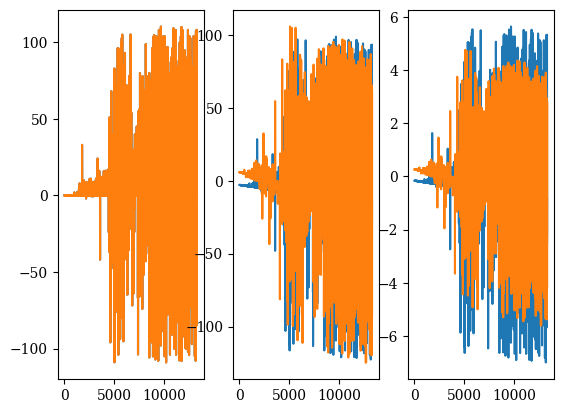

In [316]:
print(frmshift.shape)
plt.subplot(121)
plt.plot(frmshift[0,0:8000])
plt.subplot(122)
plt.plot(frmshift[1,0:8000])
print(np.mean(frmshift[0,:]), np.mean(frmshift[1,:]))

t0 = 0
dt = 1 # In seconds
# We also create a time array in years.
N = fnu
t = np.arange(0, N) * dt + t0

datx = frmshift[0,:]
daty = frmshift[1,:]

dat = datx
px = np.polyfit(t - t0, dat, 1)

dat_notrend = dat - np.polyval(px, t - t0)
std = dat_notrend.std()         # Standard deviation
var = std ** 2                  # Variance
dat_norm = dat_notrend / std    # Normalized dataset

plt.subplot(131)
plt.plot(datx)
plt.subplot(132)
plt.plot(dat_notrend)
plt.subplot(133)
plt.plot(dat_norm)
print('x slope:', px)

dat = daty
py = np.polyfit(t - t0, dat, 1)
dat_notrend = dat - np.polyval(py, t - t0)
std = dat_notrend.std()         # Standard deviation
var = std ** 2                  # Variance
dat_norm = dat_notrend / std    # Normalized dataset

plt.subplot(131)
plt.plot(datx)
plt.subplot(132)
plt.plot(dat_notrend)
plt.subplot(133)
plt.plot(dat_norm)
print('y slope:', py)

x slope: [ 2.58543131e-03 -2.95738828e+00]
y slope: [-2.78762627e-05  1.48038697e-01]


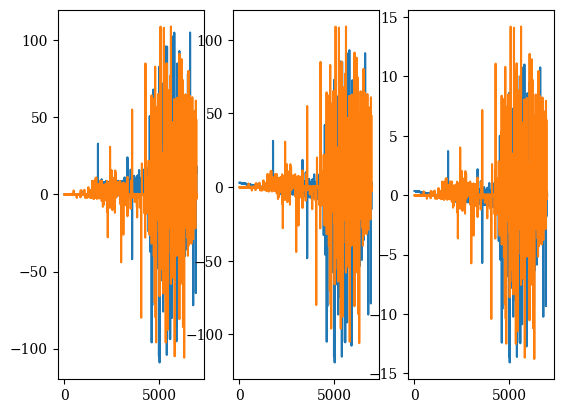

In [317]:
t0 = 0
dt = 1 # In seconds
# We also create a time array in years.
N = 7000
t = np.arange(0, N) * dt + t0

datx = frmshift[0,0:N]
daty = frmshift[1,0:N]

dat = datx
px = np.polyfit(t - t0, dat, 1)

dat_notrend = dat - np.polyval(px, t - t0)
std = dat_notrend.std()         # Standard deviation
var = std ** 2                  # Variance
dat_norm = dat_notrend / std    # Normalized dataset

plt.subplot(131)
plt.plot(datx)
plt.subplot(132)
plt.plot(dat_notrend)
plt.subplot(133)
plt.plot(dat_norm)
print('x slope:', px)

dat = daty
py = np.polyfit(t - t0, dat, 1)
dat_notrend = dat - np.polyval(py, t - t0)
std = dat_notrend.std()         # Standard deviation
var = std ** 2                  # Variance
dat_norm = dat_notrend / std    # Normalized dataset

plt.subplot(131)
plt.plot(dat)
plt.subplot(132)
plt.plot(dat_notrend)
plt.subplot(133)
plt.plot(dat_norm)
print('y slope:', py)

---
### **Notebook 3.0**
#### img registration 1st. 
STEP 5: Saving the 1st-order fitting results of the frames shift value. 

(13282,)
(13282,) (13282,)


/var/folders/j1/t8_gk27x5wq61xjjlpw5qqcw0000gn/T/ipykernel_74060/2142826577.py:24: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


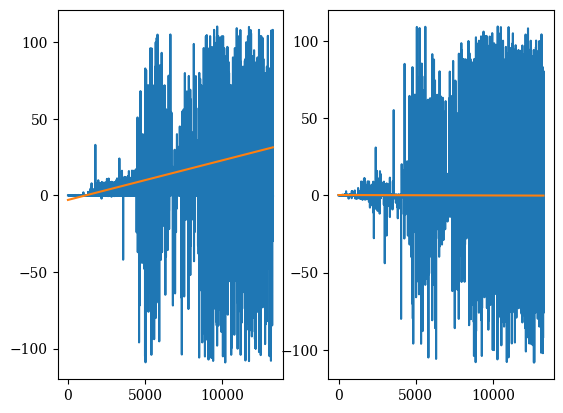

In [318]:
t0 = 0
dt = 1 # In seconds
# We also create a time array in years.
N = fnu
t = np.arange(0, N) * dt + t0

ax = np.polyval(px, t - t0)
ay = np.polyval(py, t - t0)

ax.dtype
plt.plot(ax)

print(ax.shape)

frmshift2 = np.zeros([2, fnu])
# dn = np.arange(fnu)
# print(dn[fnu-1])
# print(dn.size, frmshift.shape, frmshift2.shape)

frmshift2[0, :] = ax
frmshift2[1, :] = ay
# frmshift2 = np.zeros([2, fnu])

plt.subplot(121)
plt.plot(frmshift[0, :] )
plt.plot(ax)
plt.subplot(122)
plt.plot(frmshift[1, :])
plt.plot(ay)

print(ax.shape, ay.shape)
np.save(path1 + 'fit_frmshift_1st.npy', frmshift2)

In [319]:
# # 调整全局字体大小和样式以符合 Nature 风格
# plt.rcParams.update({
#     'font.size': 12,           # 全局字体大小
#     'axes.titlesize': 14,      # 图标题字体大小
#     'axes.labelsize': 12,      # 坐标轴标签字体大小
#     'xtick.labelsize': 10,     # x轴刻度字体大小
#     'ytick.labelsize': 10,     # y轴刻度字体大小
#     'legend.fontsize': 12,     # 图例字体大小
#     'figure.titlesize': 16,    # 全局标题字体大小
#     'font.family': 'serif',    # 字体风格
#     'mathtext.fontset': 'stix',# 数学字体与 Nature 接近
# })
# plt.figure(figsize=[10,4], dpi = 300)
# plt.subplot(121)
# plt.plot(frmshift[0, :],'c-*')
# plt.plot(ax,'k-.')
# plt.title('Shift value for X axis')
# plt.xlabel('Frame No.')
# plt.ylabel('Shift value / pixels')
# plt.subplot(122)
# plt.plot(frmshift[1, :],'g-v')
# plt.plot(ay,'k-.')
# plt.title('Shift value for Y axis')
# plt.xlabel('Frame No.')
# plt.ylabel('Shift value / pixels')
# plt.tight_layout()
# # save figure
# pathfigs = './output/'
# plt.savefig(pathfigs + 'fit1.png', bbox_inches='tight')
# plt.show()

---
### **Notebook 3.0**
#### img registration 1st. 
STEP 6: registration the frames by the fitting results of the frames shift value - frmshift2. 
- Due to the large amount of data, the execution is performed in sections to avoid memory overflow

In [320]:
# 5.0 data dark processing
listd = os.listdir(pathd)
listd.sort()
print(listd[0:10])
print(len(listd))

['image_00001.fits', 'image_00002.fits', 'image_00003.fits', 'image_00004.fits', 'image_00005.fits', 'image_00006.fits', 'image_00007.fits', 'image_00008.fits', 'image_00009.fits', 'image_00010.fits']
13282


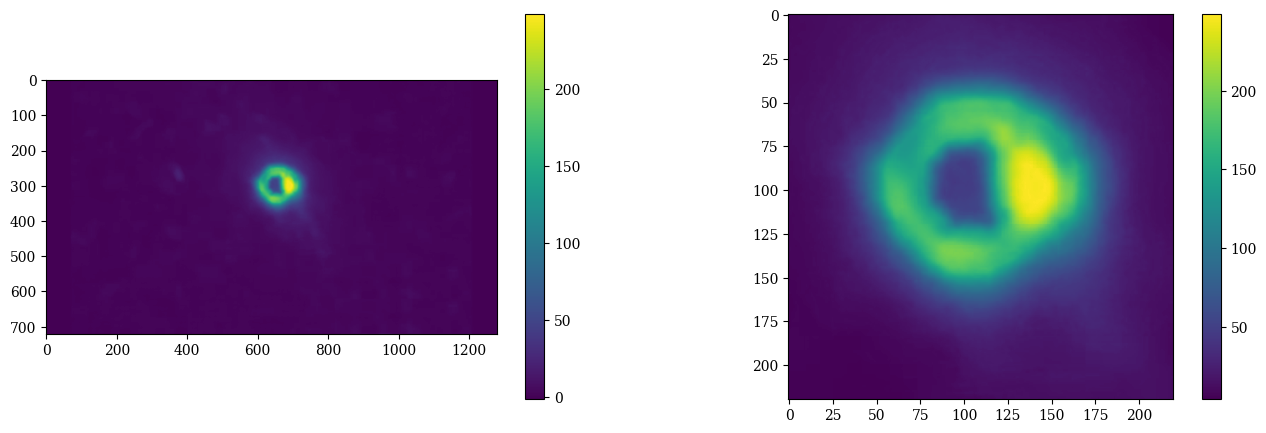

In [321]:
# 5.0 data dark processing
fn = len(list0) - st
st1 = st + 800
ch1 = 0 # chanel seclet of the jpg file.

# img0 = Image.open(pathfd + list0[st1])
# img0np = np.array(img0)

hdu = fits.open(pathfd + list0[st1])
imgnp = hdu[0].data 
    
sr,er,sc,ec = 200, 200 + 220 , 550, 550 + 220
plt.figure(figsize = [16,5])
plt.subplot(121)
plt.imshow(img0np[:, :])
plt.colorbar()
plt.subplot(122)
plt.imshow(img0np[sr:er, sc:ec])
plt.colorbar()
plt.show()

In [322]:
fg = 1                  # file gap 
fnu = int(fn / fg)      # fnu: file name useful
path1,fnu,st

('/Volumes/WD1T/share/TSE2023/iPhone/result/', 13282, 0)

In [323]:
frmshift = np.load(path1 + 'fit_frmshift_1st.npy')

In [324]:
for i in range(3000):
    hdu = fits.open(pathd + list0[i * fg + st])
    img = hdu[0].data
    sv = frmshift[:,i]
    offset1 = fourier_shift(np.fft.fftn(img), sv)
    offset1 = np.fft.ifftn(offset1)
    imgcr = offset1.real
    imgcr = imgcr.astype('float32')
    hdu1 = fits.PrimaryHDU()
    hdu1.data = imgcr
    new_hdu = fits.HDUList([hdu1])
    nname = 'r1_' + list0[st + i * fg ]         # nname: new name
    new_hdu.writeto(dirr1t + nname, overwrite=True) 
    name = f'frame{str(i).zfill(5)}'
    plt.figure(figsize = [10,5])
    plt.subplot(121)
    plt.imshow(img, origin='lower',cmap='gray') 
    tn1 = name + '_preprocessed'
    plt.title(tn1)
    plt.subplot(122)
    plt.imshow(imgcr, origin='lower',cmap='gray') 
    tn2 = name + '_regisration 1st'
    plt.title(tn2)
    plt.tight_layout()
    plt.savefig(dirr1t_png + name)
    plt.close()
    print('frame_sir2', i*fg, list0[i * fg + st], 'saved over.', sv)  

frame_sir2 0 image_00001.fits saved over. [-2.95738828  0.1480387 ]
frame_sir2 1 image_00002.fits saved over. [-2.95480285  0.14801082]
frame_sir2 2 image_00003.fits saved over. [-2.95221742  0.14798294]
frame_sir2 3 image_00004.fits saved over. [-2.94963199  0.14795507]
frame_sir2 4 image_00005.fits saved over. [-2.94704656  0.14792719]
frame_sir2 5 image_00006.fits saved over. [-2.94446112  0.14789932]
frame_sir2 6 image_00007.fits saved over. [-2.94187569  0.14787144]
frame_sir2 7 image_00008.fits saved over. [-2.93929026  0.14784356]
frame_sir2 8 image_00009.fits saved over. [-2.93670483  0.14781569]
frame_sir2 9 image_00010.fits saved over. [-2.9341194   0.14778781]
frame_sir2 10 image_00011.fits saved over. [-2.93153397  0.14775993]
frame_sir2 11 image_00012.fits saved over. [-2.92894854  0.14773206]
frame_sir2 12 image_00013.fits saved over. [-2.9263631   0.14770418]
frame_sir2 13 image_00014.fits saved over. [-2.92377767  0.14767631]
frame_sir2 14 image_00015.fits saved over. [

In [325]:
for i in range(3000,6000):
    hdu = fits.open(pathd + list0[i * fg + st])
    img = hdu[0].data
    sv = frmshift[:,i]
    offset1 = fourier_shift(np.fft.fftn(img), sv)
    offset1 = np.fft.ifftn(offset1)
    imgcr = offset1.real
    imgcr = imgcr.astype('float32')
    hdu1 = fits.PrimaryHDU()
    hdu1.data = imgcr
    new_hdu = fits.HDUList([hdu1])
    nname = 'r1_' + list0[st + i * fg ]         # nname: new name
    new_hdu.writeto(dirr1t + nname, overwrite=True) 
    name = f'frame{str(i).zfill(5)}'
    plt.figure(figsize = [10,5])
    plt.subplot(121)
    plt.imshow(img, origin='lower',cmap='gray') 
    tn1 = name + '_preprocessed'
    plt.title(tn1)
    plt.subplot(122)
    plt.imshow(imgcr, origin='lower',cmap='gray') 
    tn2 = name + '_regisration 1st'
    plt.title(tn2)
    plt.tight_layout()
    plt.savefig(dirr1t_png + name)
    plt.close()
    print('frame_sir2', i*fg, 'saved over.', sv)  

frame_sir2 3000 saved over. [4.79890565 0.06440991]
frame_sir2 3001 saved over. [4.80149108 0.06438203]
frame_sir2 3002 saved over. [4.80407651 0.06435416]
frame_sir2 3003 saved over. [4.80666194 0.06432628]
frame_sir2 3004 saved over. [4.80924737 0.0642984 ]
frame_sir2 3005 saved over. [4.81183281 0.06427053]
frame_sir2 3006 saved over. [4.81441824 0.06424265]
frame_sir2 3007 saved over. [4.81700367 0.06421477]
frame_sir2 3008 saved over. [4.8195891 0.0641869]
frame_sir2 3009 saved over. [4.82217453 0.06415902]
frame_sir2 3010 saved over. [4.82475996 0.06413115]
frame_sir2 3011 saved over. [4.82734539 0.06410327]
frame_sir2 3012 saved over. [4.82993082 0.06407539]
frame_sir2 3013 saved over. [4.83251626 0.06404752]
frame_sir2 3014 saved over. [4.83510169 0.06401964]
frame_sir2 3015 saved over. [4.83768712 0.06399176]
frame_sir2 3016 saved over. [4.84027255 0.06396389]
frame_sir2 3017 saved over. [4.84285798 0.06393601]
frame_sir2 3018 saved over. [4.84544341 0.06390814]
frame_sir2 301

In [326]:
for i in range(6000,9000):
    hdu = fits.open(pathd + list0[i * fg + st])
    img = hdu[0].data
    sv = frmshift[:,i]
    offset1 = fourier_shift(np.fft.fftn(img), sv)
    offset1 = np.fft.ifftn(offset1)
    imgcr = offset1.real
    imgcr = imgcr.astype('float32')
    hdu1 = fits.PrimaryHDU()
    hdu1.data = imgcr
    new_hdu = fits.HDUList([hdu1])
    nname = 'r1_' + list0[st + i * fg ]         # nname: new name
    new_hdu.writeto(dirr1t + nname, overwrite=True) 
    name = f'frame{str(i).zfill(5)}'
    plt.figure(figsize = [10,5])
    plt.subplot(121)
    plt.imshow(img, origin='lower',cmap='gray') 
    tn1 = name + '_preprocessed'
    plt.title(tn1)
    plt.subplot(122)
    plt.imshow(imgcr, origin='lower',cmap='gray') 
    tn2 = name + '_regisration 1st'
    plt.title(tn2)
    plt.tight_layout()
    plt.savefig(dirr1t_png + name)
    plt.close()
    print('frame_sir2', i*fg, 'saved over.', sv)  

frame_sir2 6000 saved over. [12.55519958 -0.01921888]
frame_sir2 6001 saved over. [12.55778501 -0.01924676]
frame_sir2 6002 saved over. [12.56037044 -0.01927463]
frame_sir2 6003 saved over. [12.56295587 -0.01930251]
frame_sir2 6004 saved over. [12.5655413  -0.01933038]
frame_sir2 6005 saved over. [12.56812673 -0.01935826]
frame_sir2 6006 saved over. [12.57071217 -0.01938614]
frame_sir2 6007 saved over. [12.5732976  -0.01941401]
frame_sir2 6008 saved over. [12.57588303 -0.01944189]
frame_sir2 6009 saved over. [12.57846846 -0.01946977]
frame_sir2 6010 saved over. [12.58105389 -0.01949764]
frame_sir2 6011 saved over. [12.58363932 -0.01952552]
frame_sir2 6012 saved over. [12.58622475 -0.01955339]
frame_sir2 6013 saved over. [12.58881018 -0.01958127]
frame_sir2 6014 saved over. [12.59139562 -0.01960915]
frame_sir2 6015 saved over. [12.59398105 -0.01963702]
frame_sir2 6016 saved over. [12.59656648 -0.0196649 ]
frame_sir2 6017 saved over. [12.59915191 -0.01969278]
frame_sir2 6018 saved over. 

In [327]:
for i in range(9000,fnu):
    hdu = fits.open(pathd + list0[i * fg + st])
    img = hdu[0].data
    sv = frmshift[:,i]
    offset1 = fourier_shift(np.fft.fftn(img), sv)
    offset1 = np.fft.ifftn(offset1)
    imgcr = offset1.real
    imgcr = imgcr.astype('float32')
    hdu1 = fits.PrimaryHDU()
    hdu1.data = imgcr
    new_hdu = fits.HDUList([hdu1])
    nname = 'r1_' + list0[st + i * fg ]         # nname: new name
    new_hdu.writeto(dirr1t + nname, overwrite=True) 
    name = f'frame{str(i).zfill(5)}'
    plt.figure(figsize = [10,5])
    plt.subplot(121)
    plt.imshow(img, origin='lower',cmap='gray') 
    tn1 = name + '_preprocessed'
    plt.title(tn1)
    plt.subplot(122)
    plt.imshow(imgcr, origin='lower',cmap='gray') 
    tn2 = name + '_regisration 1st'
    plt.title(tn2)
    plt.tight_layout()
    plt.savefig(dirr1t_png + name)
    plt.close()
    print('frame_sir2', i*fg, 'saved over.', sv)  

frame_sir2 9000 saved over. [20.31149351 -0.10284767]
frame_sir2 9001 saved over. [20.31407894 -0.10287554]
frame_sir2 9002 saved over. [20.31666437 -0.10290342]
frame_sir2 9003 saved over. [20.3192498 -0.1029313]
frame_sir2 9004 saved over. [20.32183523 -0.10295917]
frame_sir2 9005 saved over. [20.32442066 -0.10298705]
frame_sir2 9006 saved over. [20.3270061  -0.10301492]
frame_sir2 9007 saved over. [20.32959153 -0.1030428 ]
frame_sir2 9008 saved over. [20.33217696 -0.10307068]
frame_sir2 9009 saved over. [20.33476239 -0.10309855]
frame_sir2 9010 saved over. [20.33734782 -0.10312643]
frame_sir2 9011 saved over. [20.33993325 -0.10315431]
frame_sir2 9012 saved over. [20.34251868 -0.10318218]
frame_sir2 9013 saved over. [20.34510411 -0.10321006]
frame_sir2 9014 saved over. [20.34768955 -0.10323794]
frame_sir2 9015 saved over. [20.35027498 -0.10326581]
frame_sir2 9016 saved over. [20.35286041 -0.10329369]
frame_sir2 9017 saved over. [20.35544584 -0.10332156]
frame_sir2 9018 saved over. [2

---
### **Notebook 3.0**
#### img registration 1st. 
STEP 7: output the regitstration result - r1_fddata.mp4. 

In [328]:
# import numpy as np
# import cv2
# from PIL import Image

# fps = 240*8

# image_folder = dirr1t_png
# video_name = 'r1_fddata.mp4'  # registration, dark flat processed data of before

# images = [img for img in os.listdir(image_folder) if img.endswith(".png")]
# frame = cv2.imread(os.path.join(image_folder, images[0]))
# height, width, layers = frame.shape
# fourcc = cv2.VideoWriter_fourcc(*'XVID')
# video = cv2.VideoWriter(path1 + video_name, fourcc, fps, (width,height))
# for image in images:
#     video.write(cv2.imread(os.path.join(image_folder, image)))
# cv2.destroyAllWindows()
# video.release()

In [329]:
import os
import glob

# delete ._* files
files_to_delete = glob.glob(os.path.join(dirr1t_png, '._*'))

for file in files_to_delete:
    try:
        os.remove(file)
        print(f"Deleted: {file}")
    except Exception as e:
        print(f"Error deleting {file}: {e}")

In [330]:
fps = 240*5.6

image_folder = dirr1t_png
video_name = 'r1_fddata.mp4'  # registration, dark flat processed data of before

# Collect all PNG images and sort them alphabetically (or by filename)
images = [img for img in os.listdir(image_folder) if img.endswith(".png")]
images.sort()  # Ensure images are in the correct order

# Read the first image to get the size
frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = frame.shape

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Using 'mp4v' for MP4 format
video = cv2.VideoWriter(os.path.join(path1, video_name), fourcc, fps, (width, height))

# Loop through images and write them to the video
for image in images[480:12960]:
    img_path = os.path.join(image_folder, image)
    img = cv2.imread(img_path)
    video.write(img)

# Release the video writer and close any OpenCV windows
cv2.destroyAllWindows()
video.release()

: 